Importamos dependencias

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./data/covid19-cases-worldwide.csv')

Procesamos la fecha para convertirla en datetime

In [65]:
df['dateRep'] = df['dateRep'].apply(lambda dt: datetime.strptime(dt, '%d/%m/%Y'))

In [66]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-29,29,5,2020,580,8,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-28,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-27,27,5,2020,658,1,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-26,26,5,2020,591,1,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-25,25,5,2020,584,2,Afghanistan,AF,AFG,37172386.0,Asia


In [67]:
df.describe()

,day,month,year,cases,deaths,popData2018
count,20084.000000,20084.000000,20084.000000,20084.000000,20084.000000,1.980300e+04
mean,16.275095,3.633390,2019.996664,287.638618,17.929148,4.997769e+07
std,8.679024,1.374207,0.057663,1739.698954,124.397238,1.725276e+08
min,1.000000,1.000000,2019.000000,-2461.000000,-1918.000000,1.000000e+03
25%,9.000000,3.000000,2020.000000,0.000000,0.000000,2.119275e+06
50%,17.000000,4.000000,2020.000000,2.000000,0.000000,9.587522e+06
75%,24.000000,5.000000,2020.000000,46.000000,1.000000,3.369995e+07
max,31.000000,12.000000,2020.000000,48529.000000,4928.000000,1.392730e+09


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20084 entries, 0 to 20083
Data columns (total 11 columns):
dateRep                    20084 non-null datetime64[ns]
day                        20084 non-null int64
month                      20084 non-null int64
year                       20084 non-null int64
cases                      20084 non-null int64
deaths                     20084 non-null int64
countriesAndTerritories    20084 non-null object
geoId                      20008 non-null object
countryterritoryCode       19808 non-null object
popData2018                19803 non-null float64
continentExp               20084 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 1.7+ MB


In [7]:
df.continentExp.unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

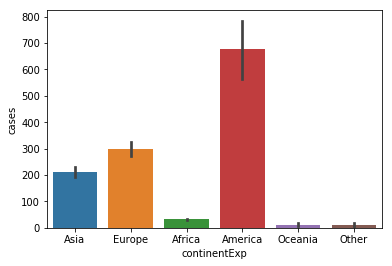

In [9]:
sns.barplot(x='continentExp', y='cases', data=df)

In [30]:
dates = df['dateRep'].unique()[::-1]
dates

array(['07/03/2020', '03/03/2020', '04/03/2020', '05/03/2020',
       '06/03/2020', '09/03/2020', '10/03/2020', '12/03/2020',
       '13/03/2020', '14/03/2020', '31/12/2019', '01/01/2020',
       '02/01/2020', '03/01/2020', '04/01/2020', '05/01/2020',
       '06/01/2020', '07/01/2020', '08/01/2020', '09/01/2020',
       '10/01/2020', '11/01/2020', '12/01/2020', '13/01/2020',
       '14/01/2020', '15/01/2020', '16/01/2020', '17/01/2020',
       '18/01/2020', '19/01/2020', '20/01/2020', '21/01/2020',
       '22/01/2020', '23/01/2020', '24/01/2020', '25/01/2020',
       '26/01/2020', '27/01/2020', '28/01/2020', '29/01/2020',
       '30/01/2020', '31/01/2020', '01/02/2020', '02/02/2020',
       '03/02/2020', '04/02/2020', '05/02/2020', '06/02/2020',
       '07/02/2020', '08/02/2020', '09/02/2020', '10/02/2020',
       '11/02/2020', '12/02/2020', '13/02/2020', '14/02/2020',
       '15/02/2020', '16/02/2020', '17/02/2020', '18/02/2020',
       '19/02/2020', '20/02/2020', '21/02/2020', '22/02

In [31]:
cases = df.groupby(['dateRep'])['cases'].sum()
cases

dateRep
01/01/2020        0
01/02/2020     2120
01/03/2020     1819
01/04/2020    72599
01/05/2020    84586
              ...  
30/03/2020    57810
30/04/2020    77806
31/01/2020     2003
31/03/2020    63561
31/12/2019       27
Name: cases, Length: 151, dtype: int64

In [34]:
cases.index

Index(['01/01/2020', '01/02/2020', '01/03/2020', '01/04/2020', '01/05/2020',
       '02/01/2020', '02/02/2020', '02/03/2020', '02/04/2020', '02/05/2020',
       ...
       '29/02/2020', '29/03/2020', '29/04/2020', '29/05/2020', '30/01/2020',
       '30/03/2020', '30/04/2020', '31/01/2020', '31/03/2020', '31/12/2019'],
      dtype='object', name='dateRep', length=151)

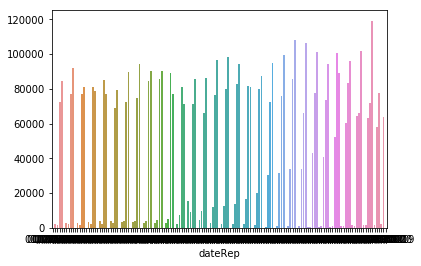

In [33]:
sns.barplot(x=cases.index, y=cases.values)

In [69]:
df_spain = df[df['countriesAndTerritories']=='Spain']
df_spain.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
17170,2020-05-28,28,5,2020,1137,1,Spain,ES,ESP,46723749.0,Europe
17171,2020-05-27,27,5,2020,510,1,Spain,ES,ESP,46723749.0,Europe
17172,2020-05-26,26,5,2020,859,283,Spain,ES,ESP,46723749.0,Europe
17173,2020-05-25,25,5,2020,-372,-1918,Spain,ES,ESP,46723749.0,Europe
17174,2020-05-24,24,5,2020,482,74,Spain,ES,ESP,46723749.0,Europe


In [83]:
df_spain_sort = df_spain[df_spain['dateRep']>'2020-03-01']
df_spain_sort.dateRep.values

array(['2020-05-28T00:00:00.000000000', '2020-05-27T00:00:00.000000000',
       '2020-05-26T00:00:00.000000000', '2020-05-25T00:00:00.000000000',
       '2020-05-24T00:00:00.000000000', '2020-05-23T00:00:00.000000000',
       '2020-05-22T00:00:00.000000000', '2020-05-21T00:00:00.000000000',
       '2020-05-20T00:00:00.000000000', '2020-05-19T00:00:00.000000000',
       '2020-05-18T00:00:00.000000000', '2020-05-17T00:00:00.000000000',
       '2020-05-16T00:00:00.000000000', '2020-05-15T00:00:00.000000000',
       '2020-05-14T00:00:00.000000000', '2020-05-13T00:00:00.000000000',
       '2020-05-12T00:00:00.000000000', '2020-05-11T00:00:00.000000000',
       '2020-05-10T00:00:00.000000000', '2020-05-09T00:00:00.000000000',
       '2020-05-08T00:00:00.000000000', '2020-05-07T00:00:00.000000000',
       '2020-05-06T00:00:00.000000000', '2020-05-05T00:00:00.000000000',
       '2020-05-04T00:00:00.000000000', '2020-05-03T00:00:00.000000000',
       '2020-05-02T00:00:00.000000000', '2020-05-01

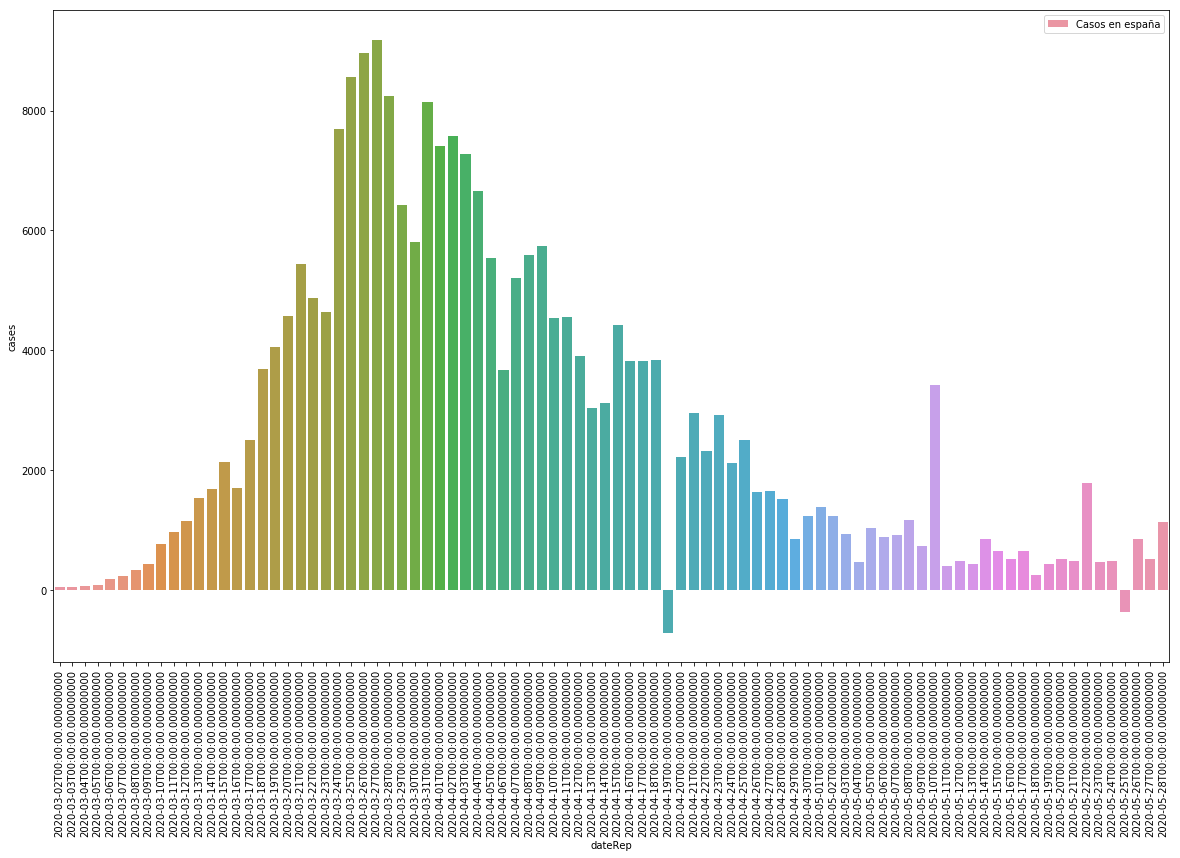

In [84]:
plt.figure(figsize=(20,12))
sns.barplot(x='dateRep', y='cases', data=df_spain_sort.sort_values(by=['dateRep']), label='Casos en españa')
plt.legend()
plt.xticks(rotation=90)
plt.show()